In [94]:
## Welcome to Week 5 ##
# Today we are going to investigate overfitting and hyperparameters

##Imports##
__author__ = 'bdyetton'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier

In [95]:
#Load data
all_charts = pd.read_csv('BillboardLyricData.txt', sep='\t', encoding='utf-8')
all_charts = all_charts.dropna() ## Remove missing data
print('Raw DataFrame size:',all_charts.shape)

Raw DataFrame size: (1730, 8)


In [96]:
# Song lyrics are converted to vectors of word counts via sklearn
n_features_to_extract_from_text = 1000 #Number of predictor variables (words to use as predictors)
vectorizer = CountVectorizer(max_df=0.95, min_df=2,max_features=n_features_to_extract_from_text,stop_words='english')                              
vectorizer.fit(all_charts.lyrics) #Creates the dictionary to convert lyrics to counts
word_vector = vectorizer.transform(all_charts.lyrics) #Does actual conversion
X = word_vector.todense()
print('X data (word count features) size',X.shape)

X data (word count features) size (1730, 1000)


In [97]:
# 7. Convert genre lables to ints
class_mapping = {label:idx for idx,label in enumerate(np.unique(all_charts.chart))}
y = all_charts.chart.map(class_mapping)

In [98]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [99]:
# Scale X Data
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

C:\Users\bdyet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


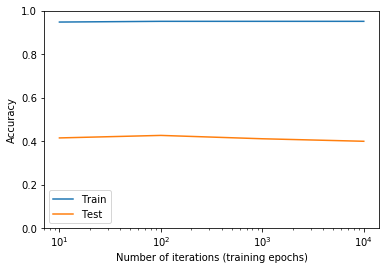

In [102]:
#Training and Test wrt. n_iterations:
n_iters = np.logspace(1,4,num=4)
train_acc = []
test_acc = []
for n_iter in n_iters:
    # sklearn implementation
    model_2 = SGDClassifier(loss='log', n_iter=n_iter, penalty='none')
    model_2.fit(X_train, y_train)
    train_acc.append(model_2.score(X_train, y_train))
    test_acc.append(model_2.score(X_test, y_test))
    
plt.plot(n_iters,train_acc,label='Train')
plt.plot(n_iters,test_acc,label='Test')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.xlabel('Number of iterations (training epochs)')
plt.legend()
plt.ylim((0,1))
plt.show()

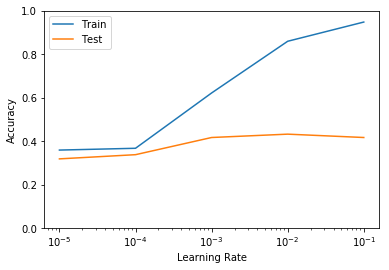

In [103]:
#Training and Test wrt. Learning Rate:
learning_rates = np.logspace(-5, -1 , num=5)
train_acc = []
test_acc = []
for lr in learning_rates:
    # sklearn implementation
    model_2 = SGDClassifier(loss='log', n_iter=100, learning_rate='constant', eta0=lr, penalty='none')
    model_2.fit(X_train, y_train)
    train_acc.append(model_2.score(X_train, y_train))
    test_acc.append(model_2.score(X_test, y_test))
    
plt.plot(learning_rates,train_acc,label='Train')
plt.plot(learning_rates,test_acc,label='Test')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.legend()
plt.ylim((0,1))
plt.show()
    

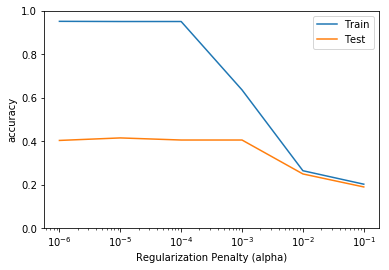

In [107]:
#Training and Test wrt. Learning Rate:
#Alpha is how much l1/l2 regularization penalty we want to apply
alphas = np.logspace(-6, -1 , num=6)
train_acc = []
test_acc = []
for alpha in alphas:
    # sklearn implementation
    model_2 = SGDClassifier(loss='log', n_iter=100, penalty='l1',alpha=alpha)
    model_2.fit(X_train, y_train)
    train_acc.append(model_2.score(X_train, y_train))
    test_acc.append(model_2.score(X_test, y_test))
    
plt.plot(alphas,train_acc,label='Train')
plt.plot(alphas,test_acc,label='Test')
plt.xscale('log')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('Regularization Penalty (alpha)')
plt.ylim((0,1))
plt.show()